## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。


In [3]:
import json
with open("hw4_data.json","r") as f:
    data=json.load(f)

vexs=[node[0] for node in data['nodes']]
w_v=[node[1] for node in data['nodes']]

num_vexs=len(vexs)
arcs=[[0]*num_vexs for _ in range(num_vexs)]

for edge in data['edges']:
    start,end,weight=edge
    start_index=vexs.index(start)
    end_index=vexs.index(end)
    arcs[start_index][end_index]=weight
    arcs[end_index][start_index]=weight

for i in range(num_vexs):
    friends=[vexs[j] for j in range(num_vexs) if arcs[i][j]!=0]
    print(f"{vexs[i]}'s friends: {friends}")




Yanyan-Wang's friends: ['Aarebecca', 'pomelo-nwu', 'tyn1998', 'frank-zsy', 'andyhuang18', 'bifenglin', 'yangzy0603', 'lidongze0629', 'wj23027', 'yikenie', 'RackweLLizm', 'Maple0817', 'yvonneyx', 'yubo0923']
Aarebecca's friends: ['Yanyan-Wang', 'pomelo-nwu', 'tyn1998', 'frank-zsy', 'yangzy0603', 'lidongze0629', 'yikenie', 'RackweLLizm', 'Maple0817', 'yvonneyx', 'yubo0923']
pomelo-nwu's friends: ['Yanyan-Wang', 'Aarebecca', 'tyn1998', 'frank-zsy', 'will-ww', 'zhicheng-ning', 'xgdyp', 'andyhuang18', 'Zzzzzhuzhiwei', 'bifenglin', 'yangzy0603', 'lidongze0629', 'wj23027', 'PureNatural', 'birdflyi', 'lhbvvvvv', 'xiaoya-yaya', 'yikenie', 'RackweLLizm', 'Maple0817', 'yvonneyx', 'yubo0923', 'zhaosj975', 'longyanz']
tyn1998's friends: ['Yanyan-Wang', 'Aarebecca', 'pomelo-nwu', 'frank-zsy', 'will-ww', 'zhicheng-ning', 'xgdyp', 'stevending1st', 'andyhuang18', 'Zzzzzhuzhiwei', 'wxharry', 'bifenglin', 'yangzy0603', 'lidongze0629', 'wj23027', 'PureNatural', 'kunal8411', 'birdflyi', 'lhbvvvvv', 'xiaoya


#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。


In [12]:
arr=[[vexs[i],len(vexs)-sum(1 for x in arcs[i] if x==0)] for i in range(len(vexs))]

for i in range(len(vexs)):
    total_connections=sum(1 for x in arcs[i] if x!=0)
    dummy=total_connections

brr=[[vexs[i],w_v[i]] for i in range(len(vexs))]
crr=[[vexs[i],(arr[i][1]+brr[i][1])/2] for i in range(len(vexs))]

print(arr[:5])
arr.sort(key=lambda x: x[1], reverse=True)
print(brr[:5])
brr.sort(key=lambda x: x[1], reverse=True)
print(crr[:5])
crr.sort(key=lambda x: x[1], reverse=True)

[['Yanyan-Wang', 14], ['Aarebecca', 11], ['pomelo-nwu', 24], ['tyn1998', 30], ['frank-zsy', 30]]
[['Yanyan-Wang', 50.95], ['Aarebecca', 23.82], ['pomelo-nwu', 22.36], ['tyn1998', 16.64], ['frank-zsy', 15.8]]
[['Yanyan-Wang', 32.475], ['Aarebecca', 17.41], ['pomelo-nwu', 23.18], ['tyn1998', 23.32], ['frank-zsy', 22.9]]



#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。


In [7]:
def new_friend_recommend(name):
    user_index = vexs.index(name)    
    new_friends = [[i, 0] for i in range(len(vexs)) if arcs[user_index][i] == 0 and i != user_index]
    for friend_index in range(len(vexs)):
        if arcs[user_index][friend_index] == 0:
            continue
        for new_friend in new_friends:
            if arcs[friend_index][new_friend[0]] != 0 or friend_index == user_index:
                new_friend[1] += 1

    new_friends.sort(key=lambda x: x[1], reverse=True)

    if len(new_friends) == 0:
        return None
    return vexs[new_friends[0][0]]

print(new_friend_recommend('Yanyan-Wang'))

arr = [[vexs[i], arcs[vexs.index('Yanyan-Wang')][i]] for i in range(len(vexs)) if i != vexs.index('Yanyan-Wang')]
arr.sort(key=lambda x: x[1], reverse=True)

print(arr[:5])

will-ww
[['Aarebecca', 25.3], ['pomelo-nwu', 25.09], ['yangzy0603', 11.85], ['tyn1998', 9.62], ['yvonneyx', 7.39]]


#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

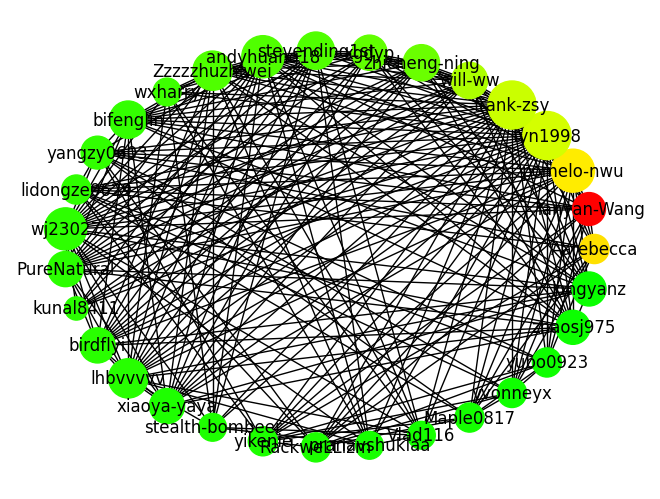

In [16]:
import networkx as nx

edges=[(vexs[i],vexs[j]) for i in range(len(vexs)) for j in range(i) if arcs[i][j]!=0]
G=nx.Graph(edges)

def weight_to_color(weight):
    threshold=20
    if 0<=weight<=threshold:
        color_value=(int(weight/threshold*256)<<16)+0xff00
    else:
        color_value=0xffff00-(int((weight-threshold)/(51-threshold)*256)<<8)
    return "#%06x"%color_value

for i in range(len(vexs)):
    G.nodes[vexs[i]]['color']=weight_to_color(w_v[i])

node_list=[i[0] for i in dict(G.degree).items()]
degree_list=[i[1] for i in dict(G.degree).items()]

dummy_variable=degree_list  
nx.draw(
    G,
    pos=nx.circular_layout(G),
    with_labels=True,
    nodelist=node_list,
    node_size=[i*40 for i in degree_list],
    node_color=list(nx.get_node_attributes(G,'color').values())
)